In [71]:
# Import the modules
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [72]:
# Read the  file from folder into a Pandas DataFrame
data = Path('Segundomodelo.xlsx')
df = pd.read_excel(data)


# Review the DataFrame
df.head()


Country - Country from URL. D1 - Are you?  \
0                  France||FR      Un homme   
1                  France||FR     Une femme   
2                  France||FR      Un homme   
3                  France||FR     Une femme   
4                  France||FR      Un homme   

  D3 - What is the number of inhabitants of the city in which you live?  \
0                          10 000 à 49 999 habitants                      
1                          10 000 à 49 999 habitants                      
2                            5 000 à 9 999 habitants                      
3                            2 000 à 4 999 habitants                      
4                          10 000 à 49 999 habitants                      

   D5 - What is the gross (average) annual income of your household?  \
0                                            64999.5                   
1                                            10000.0                   
2                                            24999.5                   
3                                            24999.5                   
4                                            24999.5                   

   What is the gross (average) annual income of your household per head  \
0                                          12999.900                      
1                                          10000.000                      
2                                           6249.875                      
3                                           6249.875                      
4                                          24999.500                      

   D4 - How old are you?  \
0                     59   
1                     64   
2                     50   
3                     36   
4                     30   

  D5 - What is the gross (average) annual income of your household?.1  \
0                                60 000 € à 69 999 €                    
1                                  Moins de 20 000 €                    
2                                20 000 € à 29 999 €                    
3                                20 000 € à 29 999 €                    
4                                20 000 € à 29 999 €                    

  D7 - What is the highest level of education you have achieved?  \
0                                              Bac+5               
1                                                Bac               
2                                        Bac+2/Bac+3               
3                                                Bac               
4                                        Bac+2/Bac+3               

   D9 - How many people are in your household (including adults, children and yourself)?  \
0                                                  5                                       
1                                                  1                                       
2                                                  4                                       
3                                                  4                                       
4                                                  1                                       

   D9a - Played video games  ...  PP3 - Better taste  PP3 - Slimming  \
0                         0  ...        5% plus cher             NaN   
1                         0  ...      Non, même prix             NaN   
2                         1  ...        5% plus cher   10% plus cher   
3                         0  ...                 NaN             NaN   
4                         1  ...        5% plus cher    5% plus cher   

   PP3 - Health/Nutrition  PP3 - Specific diet (vegan, halal, gluten-free...)  \
0            5% plus cher                                                NaN    
1          Non, même prix                                     Non, même prix    
2           10% plus cher                                       5% plus cher    
3                     NaN                                

In [73]:
# List of columns to delete
columns_to_delete = ["D9a - None of these answers", "D5 - What is the gross (average) annual income of your household?.1"]

# Use the drop() method to delete the specified columns and create a new DataFrame without them
df = df.drop(columns=columns_to_delete)

# Display the DataFrame after deleting the columns
df.head()

Country - Country from URL. D1 - Are you?  \
0                  France||FR      Un homme   
1                  France||FR     Une femme   
2                  France||FR      Un homme   
3                  France||FR     Une femme   
4                  France||FR      Un homme   

  D3 - What is the number of inhabitants of the city in which you live?  \
0                          10 000 à 49 999 habitants                      
1                          10 000 à 49 999 habitants                      
2                            5 000 à 9 999 habitants                      
3                            2 000 à 4 999 habitants                      
4                          10 000 à 49 999 habitants                      

   D5 - What is the gross (average) annual income of your household?  \
0                                            64999.5                   
1                                            10000.0                   
2                                            24999.5                   
3                                            24999.5                   
4                                            24999.5                   

   What is the gross (average) annual income of your household per head  \
0                                          12999.900                      
1                                          10000.000                      
2                                           6249.875                      
3                                           6249.875                      
4                                          24999.500                      

   D4 - How old are you?  \
0                     59   
1                     64   
2                     50   
3                     36   
4                     30   

  D7 - What is the highest level of education you have achieved?  \
0                                              Bac+5               
1                                                Bac               
2                                        Bac+2/Bac+3               
3                                                Bac               
4                                        Bac+2/Bac+3               

   D9 - How many people are in your household (including adults, children and yourself)?  \
0                                                  5                                       
1                                                  1                                       
2                                                  4                                       
3                                                  4                                       
4                                                  1                                       

   D9a - Played video games  D9a - Bought a grand piano  ...  \
0                         0                           0  ...   
1                         0                           0  ...   
2                         1                           0  ...   
3                         0                           0  ...   
4                         1                           0  ...   

   PP3 - Better taste  PP3 - Slimming  PP3 - Health/Nutrition  \
0        5% plus cher             NaN            5% plus cher   
1      Non, même prix             NaN          Non, même prix   
2        5% plus cher   10% plus cher           10% plus cher   
3                 NaN             NaN                     NaN   
4        5% plus cher    5% plus cher            5% plus cher   

   PP3 - Specific diet (vegan, halal, gluten-free...)  PP3 - Organic  \
0                                                NaN    5% plus cher   
1                                     Non, même prix             NaN   
2                                       5% plus cher    5% plus cher   
3                                                NaN             NaN   
4                                       5% plus cher   10% plus cher   

  PP3 - Animal welfare PP3 - Plant-based mea

In [75]:
# Define a dictionary that maps the current column names to the new column names
column_mapping = {
    'Country - Country from URL.': 'Country',
    'D1 - Are you?': 'Gender',
    'D3 - What is the number of inhabitants of the city in which you live?': 'population',
    'D5 - What is the gross (average) annual income of your household?': 'Income',
    'What is the gross (average) annual income of your household per head': 'incomepc',
    'D4 - How old are you?': 'Age',
    'D7 - What is the highest level of education you have achieved?': 'Education',
    'D9 - How many people are in your household (including adults, children and yourself)?': 'pc',
    'D9a - Played video games': 'Videogames',
    'D9a - Bought a grand piano': 'Piano',
    'D9a - Participated in team sports classes': 'Teamsport',
    'D9a - Working out in a gym': 'gym',
    'D9a - Dine in a restaurant': 'Restaurant',
    'D9a - Founded a charity': 'Charity',
    'D9a - Making Online Purchases': 'Ecommerce',
    'PG5 - Do you feel you have enough information about the nutritional quality and environmental/social respect of the products you buy?': 'Information',
    'PP3 - Better taste': 'taste',
    'PP3 - Slimming': 'Slimming',
    'PP3 - Health/Nutrition': 'HealthNutrition',
    'PP3 - Specific diet (vegan, halal, gluten-free...)': 'SpecificDiet',
    'PP3 - Organic': 'Organic',
    'PP3 - Animal welfare': 'AnimalWelfare',
    'PP3 - Plant-based meat/milk alternatives': 'PlantBasedAlternatives',
    'PP3 - Environmental respect': 'EnvironmentalRespect',
    'PP3 - Respect social': 'SocialRespect',
    'PP3 - Local': 'Local'
}

# Use the rename() method to change the column names
df = df.rename(columns=column_mapping)

# Display the DataFrame with the new column names
df.head()


Country     Gender                 population   Income   incomepc  Age  \
0  France||FR   Un homme  10 000 à 49 999 habitants  64999.5  12999.900   59   
1  France||FR  Une femme  10 000 à 49 999 habitants  10000.0  10000.000   64   
2  France||FR   Un homme    5 000 à 9 999 habitants  24999.5   6249.875   50   
3  France||FR  Une femme    2 000 à 4 999 habitants  24999.5   6249.875   36   
4  France||FR   Un homme  10 000 à 49 999 habitants  24999.5  24999.500   30   

     Education  pc  Videogames  Piano  ...           taste       Slimming  \
0        Bac+5   5           0      0  ...    5% plus cher            NaN   
1          Bac   1           0      0  ...  Non, même prix            NaN   
2  Bac+2/Bac+3   4           1      0  ...    5% plus cher  10% plus cher   
3          Bac   4           0      0  ...             NaN            NaN   
4  Bac+2/Bac+3   1           1      0  ...    5% plus cher   5% plus cher   

   HealthNutrition    SpecificDiet        Organic   AnimalWelfare  \
0     5% plus cher             NaN   5% plus cher    5% plus cher   
1   Non, même prix  Non, même prix            NaN             NaN   
2    10% plus cher    5% plus cher   5% plus cher  Non, même prix   
3              NaN             NaN            NaN             NaN   
4     5% plus cher    5% plus cher  10% plus cher             NaN   

  PlantBasedAlternatives EnvironmentalRespect   SocialRespect           Local  
0                    NaN         5% plus cher    5% plus cher    5% plus cher  
1                    NaN       Non, même prix  Non, même prix  Non, même prix  
2                    NaN                  NaN             NaN    5% plus cher  
3                    NaN                  NaN             NaN             NaN  
4                    NaN                  NaN             NaN             NaN  

[5 rows x 26 columns]

In [76]:
df.columns

Index(['Country', 'Gender', 'population', 'Income', 'incomepc', 'Age',
       'Education', 'pc', 'Videogames', 'Piano', 'Teamsport', 'gym',
       'Restaurant', 'Charity', 'Ecommerce', 'Information', 'taste',
       'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
       'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
       'SocialRespect', 'Local'],
      dtype='object')

In [77]:
# Confirm the unique values from PP3 - Better taste
unique_values = df['Information'].unique()
print(unique_values)

['Oui, partiellement' 'Non, pas du tout' 'Oui, tout à fait']


In [78]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    'Oui, partiellement': 1,
    'Non, pas du tout': 0,
    'Oui, tout à fait': 2
}

# List of columns to apply the replacement to
columns_to_replace = ['Information']

# Use a loop to replace values in each of the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace(replace_dict)

# Review the DataFrame
df.head()


Country     Gender                 population   Income   incomepc  Age  \
0  France||FR   Un homme  10 000 à 49 999 habitants  64999.5  12999.900   59   
1  France||FR  Une femme  10 000 à 49 999 habitants  10000.0  10000.000   64   
2  France||FR   Un homme    5 000 à 9 999 habitants  24999.5   6249.875   50   
3  France||FR  Une femme    2 000 à 4 999 habitants  24999.5   6249.875   36   
4  France||FR   Un homme  10 000 à 49 999 habitants  24999.5  24999.500   30   

     Education  pc  Videogames  Piano  ...           taste       Slimming  \
0        Bac+5   5           0      0  ...    5% plus cher            NaN   
1          Bac   1           0      0  ...  Non, même prix            NaN   
2  Bac+2/Bac+3   4           1      0  ...    5% plus cher  10% plus cher   
3          Bac   4           0      0  ...             NaN            NaN   
4  Bac+2/Bac+3   1           1      0  ...    5% plus cher   5% plus cher   

   HealthNutrition    SpecificDiet        Organic   AnimalWelfare  \
0     5% plus cher             NaN   5% plus cher    5% plus cher   
1   Non, même prix  Non, même prix            NaN             NaN   
2    10% plus cher    5% plus cher   5% plus cher  Non, même prix   
3              NaN             NaN            NaN             NaN   
4     5% plus cher    5% plus cher  10% plus cher             NaN   

  PlantBasedAlternatives EnvironmentalRespect   SocialRespect           Local  
0                    NaN         5% plus cher    5% plus cher    5% plus cher  
1                    NaN       Non, même prix  Non, même prix  Non, même prix  
2                    NaN                  NaN             NaN    5% plus cher  
3                    NaN                  NaN             NaN             NaN  
4                    NaN                  NaN             NaN             NaN  

[5 rows x 26 columns]

In [79]:
# Confirm the unique values from PP3 - Better taste
unique_values = df['taste'].unique()
print(unique_values)

['5% plus cher' 'Non, même prix' nan '10% plus cher' '20% plus cher']


In [80]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    '5% plus cher': 5,
    'Non, même prix': 0,
    '10% plus cher': 10,
    '20% plus cher': 20
}

# List of columns to apply the replacement to
columns_to_replace = ['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                      'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                      'SocialRespect', 'Local']

# Use a loop to replace values in each of the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace(replace_dict)

# Review the DataFrame
df.head()


Country     Gender                 population   Income   incomepc  Age  \
0  France||FR   Un homme  10 000 à 49 999 habitants  64999.5  12999.900   59   
1  France||FR  Une femme  10 000 à 49 999 habitants  10000.0  10000.000   64   
2  France||FR   Un homme    5 000 à 9 999 habitants  24999.5   6249.875   50   
3  France||FR  Une femme    2 000 à 4 999 habitants  24999.5   6249.875   36   
4  France||FR   Un homme  10 000 à 49 999 habitants  24999.5  24999.500   30   

     Education  pc  Videogames  Piano  ...  taste  Slimming  HealthNutrition  \
0        Bac+5   5           0      0  ...    5.0       NaN              5.0   
1          Bac   1           0      0  ...    0.0       NaN              0.0   
2  Bac+2/Bac+3   4           1      0  ...    5.0      10.0             10.0   
3          Bac   4           0      0  ...    NaN       NaN              NaN   
4  Bac+2/Bac+3   1           1      0  ...    5.0       5.0              5.0   

   SpecificDiet  Organic  AnimalWelfare  PlantBasedAlternatives  \
0           NaN      5.0            5.0                     NaN   
1           0.0      NaN            NaN                     NaN   
2           5.0      5.0            0.0                     NaN   
3           NaN      NaN            NaN                     NaN   
4           5.0     10.0            NaN                     NaN   

   EnvironmentalRespect  SocialRespect  Local  
0                   5.0            5.0    5.0  
1                   0.0            0.0    0.0  
2                   NaN            NaN    5.0  
3                   NaN            NaN    NaN  
4                   NaN            NaN    NaN  

[5 rows x 26 columns]

In [81]:
# Confirm the unique values from population
unique_values = df['population'].unique()
print(unique_values)

['10 000 à 49 999 habitants' '5 000 à 9 999 habitants'
 '2 000 à 4 999 habitants' 'Moins de 2 000 habitants'
 '50 000 à 99 999 habitants' '100 000 à 499 999 habitants'
 '1 million et plus d’habitants' '500 000 à 999 999 habitants']


In [82]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    'Moins de 2 000 habitants': 1000,
    '2 000 à 4 999 habitants': 3500,
    '5 000 à 9 999 habitants': 7500,
    '10 000 à 49 999 habitants': 30000,
    '50 000 à 99 999 habitants': 75000,
    '100 000 à 499 999 habitants': 30000,
    '500 000 à 999 999 habitants': 750000,
    '1 million et plus d’habitants': 1000000
    
}

# Use the replace() method to replace the values in the column
df['population'] = df['population'].replace(replace_dict)

# Review the DataFrame
df.head()

    

Country     Gender  population   Income   incomepc  Age    Education  \
0  France||FR   Un homme       30000  64999.5  12999.900   59        Bac+5   
1  France||FR  Une femme       30000  10000.0  10000.000   64          Bac   
2  France||FR   Un homme        7500  24999.5   6249.875   50  Bac+2/Bac+3   
3  France||FR  Une femme        3500  24999.5   6249.875   36          Bac   
4  France||FR   Un homme       30000  24999.5  24999.500   30  Bac+2/Bac+3   

   pc  Videogames  Piano  ...  taste  Slimming  HealthNutrition  SpecificDiet  \
0   5           0      0  ...    5.0       NaN              5.0           NaN   
1   1           0      0  ...    0.0       NaN              0.0           0.0   
2   4           1      0  ...    5.0      10.0             10.0           5.0   
3   4           0      0  ...    NaN       NaN              NaN           NaN   
4   1           1      0  ...    5.0       5.0              5.0           5.0   

   Organic  AnimalWelfare  PlantBasedAlternatives  EnvironmentalRespect  \
0      5.0            5.0                     NaN                   5.0   
1      NaN            NaN                     NaN                   0.0   
2      5.0            0.0                     NaN                   NaN   
3      NaN            NaN                     NaN                   NaN   
4     10.0            NaN                     NaN                   NaN   

   SocialRespect  Local  
0            5.0    5.0  
1            0.0    0.0  
2            NaN    5.0  
3            NaN    NaN  
4            NaN    NaN  

[5 rows x 26 columns]

In [ ]:
# # Confirm the unique values from Education
# unique_values = df['Education'].unique()
# print(unique_values)

In [ ]:
# # Create a dictionary to map the textual values to numerical values
# replace_dict = {
#     'Collège': 7,
#     'Bac': 8,
#     'Bac+2/Bac+3': 10,
#     'Bac+5': 12,
#     'Doctorat': 14
# }

# # Use the replace() method to replace the values in the column
# df['Education'] = df['Education'].replace(replace_dict)

# # Review the DataFrame
# df.head()

    

In [83]:
# Confirm the unique values from Country
unique_values = df['Country'].unique()
print(unique_values)

['France||FR' 'UK||GB' 'Germany||DE' 'Spain||ES']


In [84]:

replace_dict = {
    'France||FR': 'FR',
    'UK||GB':'UK',
    'Germany||DE': 'DE',
    'Spain||ES': 'ES'
}

# Use the replace() method to replace the values in the column
df['Country'] = df['Country'].replace(replace_dict)

# Review the DataFrame
df.head()


Country     Gender  population   Income   incomepc  Age    Education  pc  \
0      FR   Un homme       30000  64999.5  12999.900   59        Bac+5   5   
1      FR  Une femme       30000  10000.0  10000.000   64          Bac   1   
2      FR   Un homme        7500  24999.5   6249.875   50  Bac+2/Bac+3   4   
3      FR  Une femme        3500  24999.5   6249.875   36          Bac   4   
4      FR   Un homme       30000  24999.5  24999.500   30  Bac+2/Bac+3   1   

   Videogames  Piano  ...  taste  Slimming  HealthNutrition  SpecificDiet  \
0           0      0  ...    5.0       NaN              5.0           NaN   
1           0      0  ...    0.0       NaN              0.0           0.0   
2           1      0  ...    5.0      10.0             10.0           5.0   
3           0      0  ...    NaN       NaN              NaN           NaN   
4           1      0  ...    5.0       5.0              5.0           5.0   

   Organic  AnimalWelfare  PlantBasedAlternatives  EnvironmentalRespect  \
0      5.0            5.0                     NaN                   5.0   
1      NaN            NaN                     NaN                   0.0   
2      5.0            0.0                     NaN                   NaN   
3      NaN            NaN                     NaN                   NaN   
4     10.0            NaN                     NaN                   NaN   

   SocialRespect  Local  
0            5.0    5.0  
1            0.0    0.0  
2            NaN    5.0  
3            NaN    NaN  
4            NaN    NaN  

[5 rows x 26 columns]

In [ ]:
# # Confirm the unique values from Information
# unique_values = df['Information'].unique()
# print(unique_values)

In [ ]:

# replace_dict = {
#     'Non, pas du tout': 0,
#     'Oui, partiellement': 1,
#     'Oui, tout à fait': 2
# }

# # Use the replace() method to replace the values in the column
# df['Information'] = df['Information'].replace(replace_dict)

# # Review the DataFrame
# df.head()


In [85]:
# Confirm the unique values from Gender
unique_values = df['Gender'].unique()
print(unique_values)

['Un homme' 'Une femme']


In [86]:

replace_dict = {
    'Un homme': 1,
    'Une femme': 0
}

# Use the replace() method to replace the values in the column
df['Gender'] = df['Gender'].replace(replace_dict)

# Review the DataFrame
df.head()


Country  Gender  population   Income   incomepc  Age    Education  pc  \
0      FR       1       30000  64999.5  12999.900   59        Bac+5   5   
1      FR       0       30000  10000.0  10000.000   64          Bac   1   
2      FR       1        7500  24999.5   6249.875   50  Bac+2/Bac+3   4   
3      FR       0        3500  24999.5   6249.875   36          Bac   4   
4      FR       1       30000  24999.5  24999.500   30  Bac+2/Bac+3   1   

   Videogames  Piano  ...  taste  Slimming  HealthNutrition  SpecificDiet  \
0           0      0  ...    5.0       NaN              5.0           NaN   
1           0      0  ...    0.0       NaN              0.0           0.0   
2           1      0  ...    5.0      10.0             10.0           5.0   
3           0      0  ...    NaN       NaN              NaN           NaN   
4           1      0  ...    5.0       5.0              5.0           5.0   

   Organic  AnimalWelfare  PlantBasedAlternatives  EnvironmentalRespect  \
0      5.0            5.0                     NaN                   5.0   
1      NaN            NaN                     NaN                   0.0   
2      5.0            0.0                     NaN                   NaN   
3      NaN            NaN                     NaN                   NaN   
4     10.0            NaN                     NaN                   NaN   

   SocialRespect  Local  
0            5.0    5.0  
1            0.0    0.0  
2            NaN    5.0  
3            NaN    NaN  
4            NaN    NaN  

[5 rows x 26 columns]

In [87]:
unique_values = df[['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                   'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                   'SocialRespect', 'Local']].apply(lambda x: x.unique())

print(unique_values)


   taste  Slimming  HealthNutrition  SpecificDiet  Organic  AnimalWelfare  \
0    5.0       NaN              5.0           NaN      5.0            5.0   
1    0.0      10.0              0.0           0.0      NaN            NaN   
2    NaN       5.0             10.0           5.0     10.0            0.0   
3   10.0       0.0              NaN          10.0      0.0           10.0   
4   20.0      20.0             20.0          20.0     20.0           20.0   

   PlantBasedAlternatives  EnvironmentalRespect  SocialRespect  Local  
0                     NaN                   5.0            5.0    5.0  
1                     0.0                   0.0            0.0    0.0  
2                     5.0                   NaN            NaN    NaN  
3                    10.0                  10.0           10.0   20.0  
4                    20.0                  20.0           20.0   10.0  


In [88]:
# List of columns to perform replacements in
columns_to_replace = ['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                      'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                      'SocialRespect', 'Local']

# Replace NaN values with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].fillna(0)

# Replace 20 with 10 in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(20, 10)

df.head()


Country  Gender  population   Income   incomepc  Age    Education  pc  \
0      FR       1       30000  64999.5  12999.900   59        Bac+5   5   
1      FR       0       30000  10000.0  10000.000   64          Bac   1   
2      FR       1        7500  24999.5   6249.875   50  Bac+2/Bac+3   4   
3      FR       0        3500  24999.5   6249.875   36          Bac   4   
4      FR       1       30000  24999.5  24999.500   30  Bac+2/Bac+3   1   

   Videogames  Piano  ...  taste  Slimming  HealthNutrition  SpecificDiet  \
0           0      0  ...    5.0       0.0              5.0           0.0   
1           0      0  ...    0.0       0.0              0.0           0.0   
2           1      0  ...    5.0      10.0             10.0           5.0   
3           0      0  ...    0.0       0.0              0.0           0.0   
4           1      0  ...    5.0       5.0              5.0           5.0   

   Organic  AnimalWelfare  PlantBasedAlternatives  EnvironmentalRespect  \
0      5.0            5.0                     0.0                   5.0   
1      0.0            0.0                     0.0                   0.0   
2      5.0            0.0                     0.0                   0.0   
3      0.0            0.0                     0.0                   0.0   
4     10.0            0.0                     0.0                   0.0   

   SocialRespect  Local  
0            5.0    5.0  
1            0.0    0.0  
2            0.0    5.0  
3            0.0    0.0  
4            0.0    0.0  

[5 rows x 26 columns]

In [89]:
# Count the number of NaN values per column
nan_counts = df.head().isna().sum()

# Display the number of NaN values per column
print(nan_counts)


Country                   0
Gender                    0
population                0
Income                    0
incomepc                  0
Age                       0
Education                 0
pc                        0
Videogames                0
Piano                     0
Teamsport                 0
gym                       0
Restaurant                0
Charity                   0
Ecommerce                 0
Information               0
taste                     0
Slimming                  0
HealthNutrition           0
SpecificDiet              0
Organic                   0
AnimalWelfare             0
PlantBasedAlternatives    0
EnvironmentalRespect      0
SocialRespect             0
Local                     0
dtype: int64


In [59]:
df.columns

Index(['Country', 'Gender', 'population', 'Income', 'incomepc', 'Age',
       'Education', 'pc', 'Videogames', 'Piano', 'Teamsport', 'gym',
       'Restaurant', 'Charity', 'Ecommerce', 'Information', 'taste',
       'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
       'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
       'SocialRespect', 'Local'],
      dtype='object')

In [ ]:
# # Import the StandardScaler from scikit-learn
# from sklearn.preprocessing import StandardScaler

# # Create a DataFrame with the scaled data for selected columns
# df_scaled = df[["Income", "incomepc", "Age", "pc"]].copy()

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the selected columns
# df_scaled[["Income", "incomepc", "Age", "pc"]] = scaler.fit_transform(df[["Income", "incomepc", "Age", "pc"]])

# # Copy the remaining columns to df_scaled
# df_scaled[["population","Country", "Gender", "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste", "Education", "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives", "EnvironmentalRespect", "SocialRespect", "Local"]] = df[["population","Country", "Gender", "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste", "Education", "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives", "EnvironmentalRespect", "SocialRespect", "Local"]]

# # Define the desired column order
# column_order = [
#     "Country", "Gender", "population", "Income", "incomepc", "Age", "Education", "pc",
#     "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste",
#     "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives",
#     "EnvironmentalRespect", "SocialRespect", "Local"
# ]

# # Reorder the columns in the DataFrame
# df_scaled = df_scaled[column_order]

# # Display the DataFrame with the reordered columns and scaled values
# df_scaled.head()


In [90]:
# Specify the columns to convert to dummies
columns_to_dummies = ["Country", "population", "Education", "Information", "taste", "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives", "EnvironmentalRespect", "SocialRespect", "Local"]

# Convert categorical data to numeric with pd.get_dummies
df = pd.get_dummies(df, columns=columns_to_dummies)
df.head()



Gender   Income   incomepc  Age  pc  Videogames  Piano  Teamsport  gym  \
0       1  64999.5  12999.900   59   5           0      0          0    1   
1       0  10000.0  10000.000   64   1           0      0          0    1   
2       1  24999.5   6249.875   50   4           1      0          0    0   
3       0  24999.5   6249.875   36   4           0      0          0    0   
4       1  24999.5  24999.500   30   1           1      0          0    0   

   Restaurant  ...  PlantBasedAlternatives_10.0  EnvironmentalRespect_0.0  \
0           1  ...                            0                         0   
1           1  ...                            0                         1   
2           1  ...                            0                         1   
3           0  ...                            0                         1   
4           1  ...                            0                         1   

   EnvironmentalRespect_5.0  EnvironmentalRespect_10.0  SocialRespect_0.0  \
0                         1                          0                  0   
1                         0                          0                  1   
2                         0                          0                  1   
3                         0                          0                  1   
4                         0                          0                  1   

   SocialRespect_5.0  SocialRespect_10.0  Local_0.0  Local_5.0  Local_10.0  
0                  1                   0          0          1           0  
1                  0                   0          1          0           0  
2                  0                   0          0          1           0  
3                  0                   0          1          0           0  
4                  0                   0          1          0           0  

[5 rows x 61 columns]

In [91]:
unique_values = df[['Gender', 'Videogames', 'Piano', 'Teamsport', 'gym', 'Restaurant', 'Charity', 'Ecommerce']].apply(lambda x: x.unique())

print(unique_values)


   Gender  Videogames  Piano  Teamsport  gym  Restaurant  Charity  Ecommerce
0       1           0      0          0    1           1        0          1
1       0           1      1          1    0           0        1          0


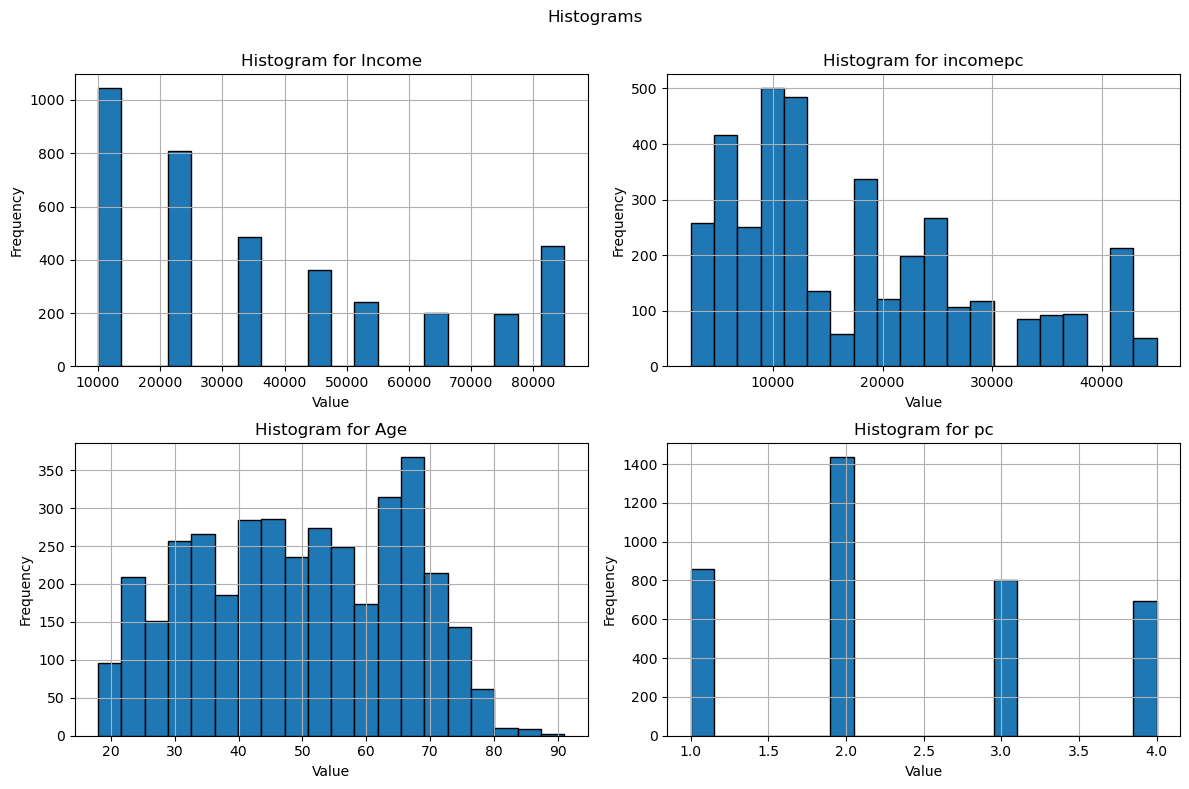

In [97]:
import matplotlib.pyplot as plt

# Specify the columns to create histograms for
columns_to_plot = ["Income", "incomepc", "Age", "pc"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histograms")

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    df[column].hist(ax=ax, bins=20, edgecolor='k')
    ax.set_title(f"Histogram for {column}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


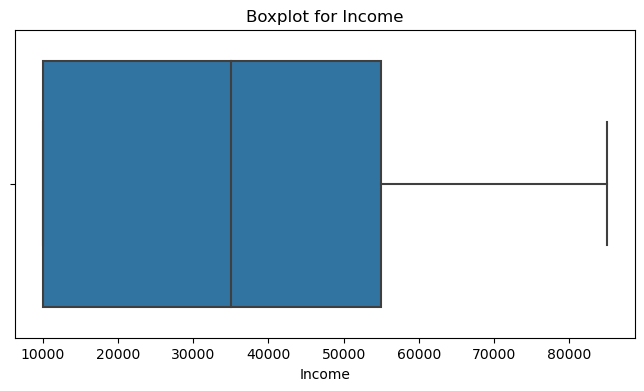

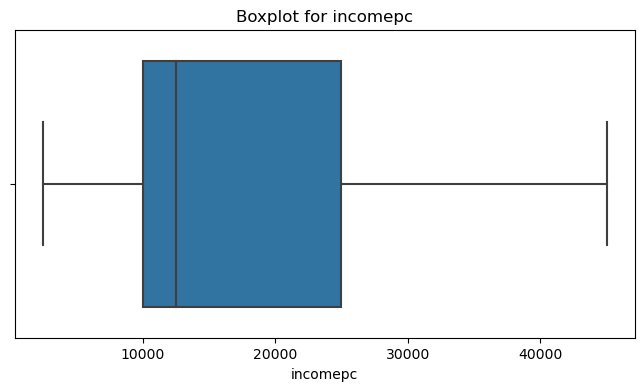

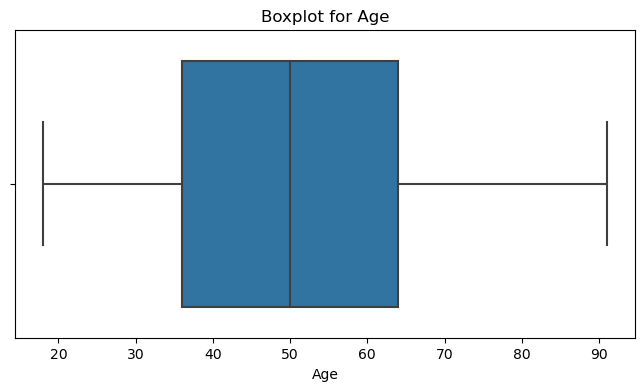

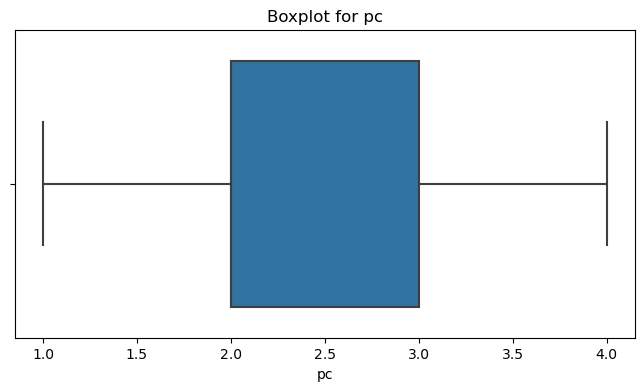

Number of rows with outliers in Income: 0
Number of rows with outliers in incomepc: 0
Number of rows with outliers in Age: 0
Number of rows with outliers in pc: 0


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns to check for outliers
columns_to_check = ["Income", "incomepc", "Age", "pc"]

# Create variables to count rows with outliers
rows_with_outliers = {column: 0 for column in columns_to_check}

# Create a boxplot for each column
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

    # Count rows with at least one outlier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    rows_with_outliers[column] = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

# Print the count of rows with outliers for each column
for column, count in rows_with_outliers.items():
    print(f"Number of rows with outliers in {column}: {count}")


In [95]:
# import pandas as pd

# # Calculate the IQR for incomepc
# Q1_incomepc = df['incomepc'].quantile(0.25)
# Q3_incomepc = df['incomepc'].quantile(0.75)
# IQR_incomepc = Q3_incomepc - Q1_incomepc

# # Define the lower and upper bounds for incomepc without outliers
# lower_bound_incomepc = Q1_incomepc - 1.5 * IQR_incomepc
# upper_bound_incomepc = Q3_incomepc + 1.5 * IQR_incomepc

# # Calculate the IQR for pc
# Q1_pc = df['pc'].quantile(0.25)
# Q3_pc = df['pc'].quantile(0.75)
# IQR_pc = Q3_pc - Q1_pc

# # Define the lower and upper bounds for pc without outliers
# lower_bound_pc = Q1_pc - 1.5 * IQR_pc
# upper_bound_pc = Q3_pc + 1.5 * IQR_pc

# # Filter the DataFrame to exclude rows with outliers
# df = df[(df['incomepc'] >= lower_bound_incomepc) & (df['incomepc'] <= upper_bound_incomepc) & (df['pc'] >= lower_bound_pc) & (df['pc'] <= upper_bound_pc)]

# # Reset the index after removing rows
# df.reset_index(drop=True, inplace=True)


In [99]:
num_rows = df.shape[0]
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 3789


In [100]:
df.columns

Index(['Gender', 'Income', 'incomepc', 'Age', 'pc', 'Videogames', 'Piano',
       'Teamsport', 'gym', 'Restaurant', 'Charity', 'Ecommerce', 'Country_DE',
       'Country_ES', 'Country_FR', 'Country_UK', 'population_1000',
       'population_3500', 'population_7500', 'population_30000',
       'population_75000', 'population_750000', 'population_1000000',
       'Education_Bac', 'Education_Bac+2/Bac+3', 'Education_Bac+5',
       'Education_Collège', 'Education_Doctorat', 'Information_0',
       'Information_1', 'Information_2', 'taste_0.0', 'taste_5.0',
       'taste_10.0', 'Slimming_0.0', 'Slimming_5.0', 'Slimming_10.0',
       'HealthNutrition_0.0', 'HealthNutrition_5.0', 'HealthNutrition_10.0',
       'SpecificDiet_0.0', 'SpecificDiet_5.0', 'SpecificDiet_10.0',
       'Organic_0.0', 'Organic_5.0', 'Organic_10.0', 'AnimalWelfare_0.0',
       'AnimalWelfare_5.0', 'AnimalWelfare_10.0', 'PlantBasedAlternatives_0.0',
       'PlantBasedAlternatives_5.0', 'PlantBasedAlternatives_10.0',
    

In [101]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to normalize
columns_to_normalize = ["Income", "incomepc", "Age", "pc"]

# Create a copy of the original DataFrame
df_normalized = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns in the copied DataFrame
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])
df_normalized.head()


Gender    Income  incomepc       Age        pc  Videogames  Piano  \
0       0  0.000000  0.176473  0.630137  0.000000           0      0   
1       1  0.199995  0.088233  0.438356  1.000000           1      0   
2       0  0.199995  0.088233  0.246575  1.000000           0      0   
3       1  0.199995  0.529406  0.164384  0.000000           1      0   
4       0  0.000000  0.058824  0.410959  0.333333           1      0   

   Teamsport  gym  Restaurant  ...  PlantBasedAlternatives_10.0  \
0          0    1           1  ...                            0   
1          0    0           1  ...                            0   
2          0    0           0  ...                            0   
3          0    0           1  ...                            0   
4          0    0           0  ...                            0   

   EnvironmentalRespect_0.0  EnvironmentalRespect_5.0  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         1   

   EnvironmentalRespect_10.0  SocialRespect_0.0  SocialRespect_5.0  \
0                          0                  1                  0   
1                          0                  1                  0   
2                          0                  1                  0   
3                          0                  1                  0   
4                          0                  1                  0   

   SocialRespect_10.0  Local_0.0  Local_5.0  Local_10.0  
0                   0          1          0           0  
1                   0          0          1           0  
2                   0          1          0           0  
3                   0          1          0           0  
4                   0          1          0           0  

[5 rows x 61 columns]

In [102]:
df.head()

Gender   Income   incomepc  Age  pc  Videogames  Piano  Teamsport  gym  \
0       0  10000.0  10000.000   64   1           0      0          0    1   
1       1  24999.5   6249.875   50   4           1      0          0    0   
2       0  24999.5   6249.875   36   4           0      0          0    0   
3       1  24999.5  24999.500   30   1           1      0          0    0   
4       0  10000.0   5000.000   48   2           1      0          0    0   

   Restaurant  ...  PlantBasedAlternatives_10.0  EnvironmentalRespect_0.0  \
0           1  ...                            0                         1   
1           1  ...                            0                         1   
2           0  ...                            0                         1   
3           1  ...                            0                         1   
4           0  ...                            0                         0   

   EnvironmentalRespect_5.0  EnvironmentalRespect_10.0  SocialRespect_0.0  \
0                         0                          0                  1   
1                         0                          0                  1   
2                         0                          0                  1   
3                         0                          0                  1   
4                         1                          0                  1   

   SocialRespect_5.0  SocialRespect_10.0  Local_0.0  Local_5.0  Local_10.0  
0                  0                   0          1          0           0  
1                  0                   0          0          1           0  
2                  0                   0          1          0           0  
3                  0                   0          1          0           0  
4                  0                   0          1          0           0  

[5 rows x 61 columns]

C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

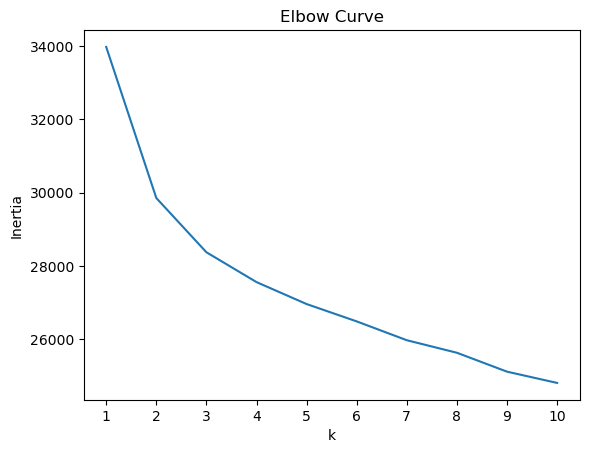

In [103]:
# CLUSTER

from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Exclude the "taste" column from df_scaled (assuming it's a Pandas DataFrame).
# 2. Create a KMeans model using the loop counter for the n_clusters.
# 3. Fit the model to the data without the "taste" column.
# 4. Append the model.inertia_ to the inertia list.
for i in k: 
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_normalized)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow1 = pd.DataFrame(elbow_data)

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_elbow1["k"], df_elbow1["inertia"])
plt.title("Elbow Curve")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks(k)
plt.show()


In [104]:
# cLUSTER
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# Assuming df_scaled contains the scaled data

# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

# Fit the K-Means model using the scaled data
model.fit(df_normalized)

# Predict the clusters to group the cryptocurrencies using the scaled data
segments = model.predict(df_normalized)

# Convert the segments array into a DataFrame
segments_df = pd.DataFrame(segments, columns=['segments'])

# Create a copy of the scaled DataFrame

df_cluster_data = df_normalized.copy()
# df_cluster_data = df_normalized.reset_index(drop=True).copy()

# Add a new column to the DataFrame with the predicted clusters
df_cluster_data['segments'] = segments_df

# Display sample data
df_cluster_data.head()



C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Gender    Income  incomepc       Age        pc  Videogames  Piano  \
0       0  0.000000  0.176473  0.630137  0.000000           0      0   
1       1  0.199995  0.088233  0.438356  1.000000           1      0   
2       0  0.199995  0.088233  0.246575  1.000000           0      0   
3       1  0.199995  0.529406  0.164384  0.000000           1      0   
4       0  0.000000  0.058824  0.410959  0.333333           1      0   

   Teamsport  gym  Restaurant  ...  EnvironmentalRespect_0.0  \
0          0    1           1  ...                         1   
1          0    0           1  ...                         1   
2          0    0           0  ...                         1   
3          0    0           1  ...                         1   
4          0    0           0  ...                         0   

   EnvironmentalRespect_5.0  EnvironmentalRespect_10.0  SocialRespect_0.0  \
0                         0                          0                  1   
1                         0                          0                  1   
2                         0                          0                  1   
3                         0                          0                  1   
4                         1                          0                  1   

   SocialRespect_5.0  SocialRespect_10.0  Local_0.0  Local_5.0  Local_10.0  \
0                  0                   0          1          0           0   
1                  0                   0          0          1           0   
2                  0                   0          1          0           0   
3                  0                   0          1          0           0   
4                  0                   0          1          0           0   

   segments  
0         0  
1         1  
2         0  
3         1  
4         1  

[5 rows x 62 columns]

In [105]:
num_rows = df_cluster_data.shape[0]
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 3789


In [129]:
# cLUSTER
df['segments'] = df_cluster_data['segments']

result = df.groupby('segments').mean()

print(result)



            Gender        Income      incomepc        Age        pc  \
segments                                                              
0         0.485096  34616.905529  16668.013842  51.723558  2.232212   
1         0.487619  40337.090952  17793.153492  48.083810  2.448571   
2         0.496206  44080.935508  18839.322585  44.503794  2.575114   

          Videogames     Piano  Teamsport       gym  Restaurant  ...  \
segments                                                         ...   
0           0.389904  0.006731   0.100481  0.181250    0.699519  ...   
1           0.552381  0.007619   0.198095  0.317143    0.847619  ...   
2           0.599393  0.015175   0.251897  0.441578    0.827011  ...   

          PlantBasedAlternatives_10.0_1  EnvironmentalRespect_0.0_1  \
segments                                                              
0                              0.011538                    0.947596   
1                              0.036190                    0.293333   

In [108]:
# Separate the y variable, the labels without the segments variables
y = df["segments"]
# Separate the X variable, the features
X = df.drop(columns="segments")

In [109]:
# Import the train_test_split module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# Specify stratify=y to ensure stratified sampling based on y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Check the shape of X_train
X_train.shape

(2841, 61)

In [112]:

value_counts = df["segments"].value_counts()


value_counts.head()



0    2080
1    1050
2     659
Name: segments, dtype: int64

In [113]:
# Now we will try to do a over sampler to confirm if this can increase the performance of the model.

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [114]:
# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()

print(label_counts)

0    1560
1    1560
2    1560
Name: segments, dtype: int64


In [115]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=5000, random_state=1, max_depth=6)


In [116]:
# Fitting the model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=6, n_estimators=5000, random_state=1)

In [117]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [118]:
# Access individual decision trees in the Random Forest model
individual_trees = rf_model.estimators_

# Initialize lists to store max_depth and min_samples_split values
max_depth_values = []
min_samples_split_values = []

# Loop through the individual trees to collect parameter values
for tree in individual_trees:
    max_depth = tree.get_params()['max_depth']
    min_samples_split = tree.get_params()['min_samples_split']
    
    max_depth_values.append(max_depth)
    min_samples_split_values.append(min_samples_split)

# Find the most common max_depth and min_samples_split values
most_common_max_depth = max(set(max_depth_values), key=max_depth_values.count)
most_common_min_samples_split = max(set(min_samples_split_values), key=min_samples_split_values.count)

print("Most common max_depth:", most_common_max_depth)
print("Most common min_samples_split:", most_common_min_samples_split)


Most common max_depth: 6
Most common min_samples_split: 2


In [119]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a specific tree from the Random Forest ensemble
decision_tree = rf_model.estimators_[0]  # Select the first tree, or specify a different index

# Convert class names to strings
class_names = [str(class_name) for class_name in rf_model.classes_]

# Create a plot for the decision tree
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names=class_names,
    impurity=False,
    fontsize=10
)

# Adjust spacing between nodes using Matplotlib
plt.subplots_adjust(left=0.1, right=4, top=0.9, bottom=0.1)  # Adjust these values as needed

# Save the plot as an image with higher DPI
plt.savefig("decision_tree.png", dpi=300)

# Display the plot
plt.show()


In [120]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a specific tree from the Random Forest ensemble
decision_tree = rf_model.estimators_[0]  # Select the first tree, or specify a different index

# Convert class names to strings
class_names = [str(class_name) for class_name in rf_model.classes_]

# Create a plot for the decision tree with a white background
plt.figure(figsize=(20, 10), dpi=300, facecolor='white')  # Set the facecolor to 'white'
plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names=class_names,
    impurity=False,
    fontsize=10
)

# Adjust spacing between nodes using Matplotlib
plt.subplots_adjust(left=0.1, right=4, top=0.9, bottom=0.1)  # Adjust these values as needed

# Save the plot as an image with higher DPI and a white background
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

# Display the plot
plt.show()


In [84]:
from sklearn.tree import export_text

# Select a specific tree from the Random Forest ensemble
decision_tree = rf_model.estimators_[0]  # Select the first tree, or specify a different index

# Convert class names to strings
class_names = [str(class_name) for class_name in rf_model.classes_]

# Get the feature names as a list of strings
feature_names = X_train.columns.tolist()

# Export the decision tree structure to a text file
tree_text = export_text(decision_tree, feature_names=feature_names)
with open("decision_tree.txt", "w") as f:
    f.write(tree_text)


In [121]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define custom labels for actual and predicted values
labels = [0, 1,2]

# Create a DataFrame with custom labels for both actual and predicted values
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Add labels for both actual and predicted values
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [122]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted    0    1    2
Actual                  
0          467   40   13
1            5  238   20
2            0    5  160

Accuracy Score : 0.9124472573839663
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       520
           1       0.84      0.90      0.87       263
           2       0.83      0.97      0.89       165

    accuracy                           0.91       948
   macro avg       0.89      0.92      0.90       948
weighted avg       0.92      0.91      0.91       948



In [123]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09797933644564259, 'EnvironmentalRespect_10.0'),
 (0.09540720230150163, 'EnvironmentalRespect_0.0'),
 (0.06707560412179611, 'EnvironmentalRespect_5.0'),
 (0.0613894455447165, 'HealthNutrition_0.0'),
 (0.0591984909270534, 'AnimalWelfare_0.0'),
 (0.0575224046841828, 'HealthNutrition_10.0'),
 (0.05568851703654748, 'AnimalWelfare_10.0'),
 (0.05256078013449214, 'Local_10.0'),
 (0.0458993371906605, 'HealthNutrition_5.0'),
 (0.04448538696319573, 'SocialRespect_0.0'),
 (0.03993349660050984, 'SocialRespect_10.0'),
 (0.033776625300864886, 'Local_0.0'),
 (0.032386446224546235, 'Local_5.0'),
 (0.02842042927174993, 'taste_0.0'),
 (0.028120091406021095, 'AnimalWelfare_5.0'),
 (0.025152356442656756, 'Organic_0.0'),
 (0.022903593244670215, 'SocialRespect_5.0'),
 (0.02215169085852688, 'Organic_10.0'),
 (0.018007433571202155, 'taste_10.0'),
 (0.017368118513191387, 'taste_5.0'),
 (0.013890896120529626, 'PlantBasedAlternatives_10.0'),
 (0.010320637820889194, 'PlantBasedAlternatives_0.0'),
 (0.00925839

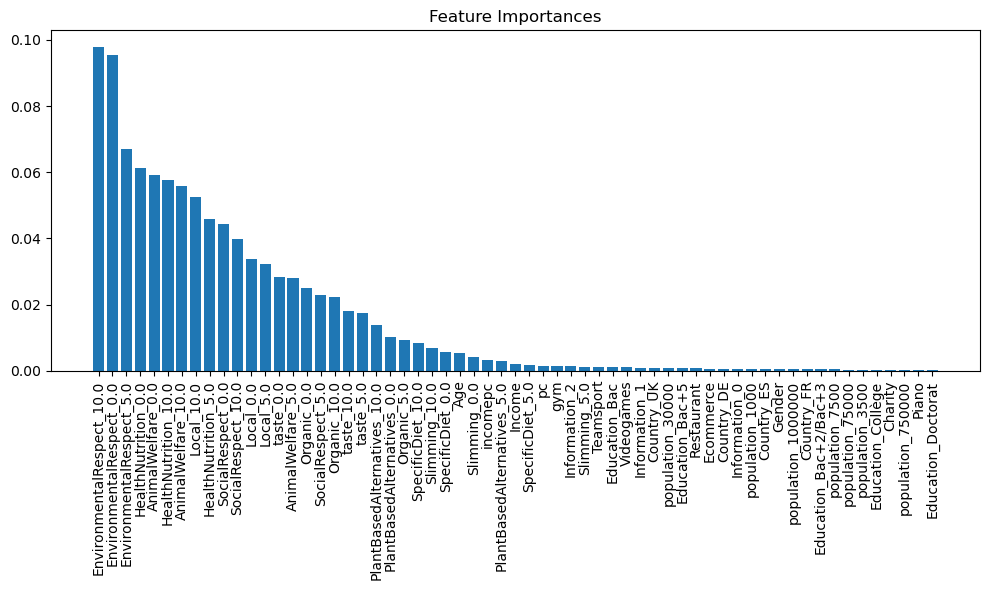

In [124]:
import numpy as np
import matplotlib.pyplot as plt  # Add this import statement

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
feature_names = X.columns  # Assuming X is your feature matrix

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [133]:
df.to_csv('segmentos_3.csv', index=False)